In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from IPython.display import IFrame, display

In [43]:
#file = 'Lectures/derivatives.pdf'
file = 'Lectures/DerivacionNumerica.pdf'
IFrame(file, width=600, height=400)

## Round of errors, encontrar el valor de epsilon para el cual 1. + epsilon = 1. 
### El error de truncación es una característica del algoritmo. Se expande alrededor de un punto despreciando terminos superiores: truncación para $|x| << 1$:

$f(x) = sin(x) = x - \frac{x^{3}}{6} + \mathcal{O}(x^{5})$

In [10]:
epsilon = 1.
while( 1. + epsilon != 1.):
    epsilon *= 0.5

print(epsilon)

1.11022302463e-16


In [11]:
def epsilon(x):
    return np.sin(x) - (x - (x**3)/6.)

In [13]:
x = np.pi

print( " x = %f, epsilon = %e " %(x, epsilon(x)) )
print( " x = %f, epsilon = %e " %(x/2, epsilon(x/2)) )

# Quiero mostrar es que la precision va como 2**5 = 32

print("The ratio is %f" %(epsilon(x)/epsilon(x/2.)))

 x = 3.141593, epsilon = 2.026120e+00 
 x = 1.570796, epsilon = 7.516777e-02 
The ratio is 26.954639


In [15]:
def Function(x):
    return np.sin(x)

def ExactDerivative(x):
    return np.cos(x)

In [30]:
xi, xf, Npoints = 0., 2*np.pi, 100
h = (xf-xi)/float(Npoints)

print(h)

0.0628318530718


In [32]:
x = np.linspace(xi,xf,Npoints)
#print(x)

In [46]:
y = Function(x)
DYE = ExactDerivative(x)

#print(y)

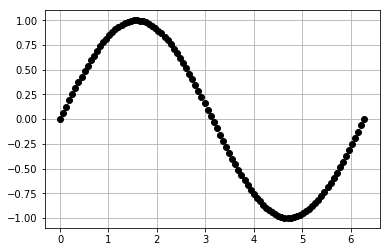

In [45]:
plt.plot(x,y,'ko')
#plt.xlim(3.,3.5)
plt.grid()

In [35]:
def RightDerivative(f,x,h):
    d = 0
    if( h!=0. ):
        d = (  f(x+h)-f(x)  ) / h
    
    return d

In [36]:
print(RightDerivative(Function,0.5*np.pi,h))

-0.03140559247032949


In [37]:
def LeftDerivative(f,x,h):
    d = 0
    if( h!=0. ):
        d = (  f(x)-f(x-h)  ) / h
    
    return d

In [38]:
print(LeftDerivative(Function,0.5*np.pi,h))

0.03140559247032949


In [39]:
def CentralDerivative(f,x,h):
    d = 0
    if( h!=0. ):
        d = (  f(x+h)-f(x-h)  ) / (2.*h)
    
    return d

In [40]:
print(CentralDerivative(Function,0.5*np.pi,h))

0.0


In [44]:
DYL = LeftDerivative(Function,x,h)
DYR = RightDerivative(Function,x,h)
DYC = CentralDerivative(Function,x,h)

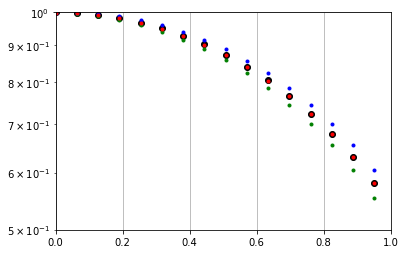

In [57]:
plt.plot(x,DYE,'ko')
plt.plot(x,DYR,'g.')
plt.plot(x,DYL,'b.')
plt.plot(x,DYC,'r.')
plt.ylim(0.5,1.)
plt.xlim(0.,1.)
plt.yscale('log')
plt.grid()

In [58]:
ErrorL = abs(DYE-DYL)
ErrorR = abs(DYE-DYR)
ErrorC = abs(DYE-DYC)

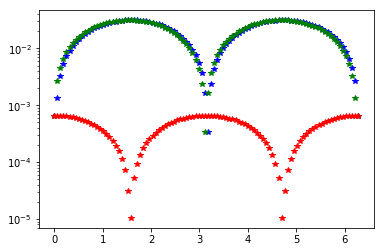

In [64]:
plt.plot(x,ErrorL,'b*')
plt.plot(x,ErrorR,'g*')
plt.plot(x,ErrorC,'r*')
plt.yscale('log')

In [66]:
# vamos a calcular el error global 

Sum_num = 0.
Sum_den = 0.

for i in range( len(ErrorL) ):
    
    Sum_num += ErrorL[i]**2
    Sum_den += DYE[i]**2
    
Error_Global = np.sqrt(Sum_num/Sum_den)
print(Error_Global)

0.03110004953714848


In [67]:
# Implementacion segunda derivada

def SecondDerivative(f,x,h):
    
    d2 = 0
    
    if( h!=0):
        d2 = ( f(x+h)+f(x-h)-2*f(x) ) / h**2
        
    return d2

In [70]:
DY2 = SecondDerivative(Function,x,h)

DY2E = -np.sin(x)

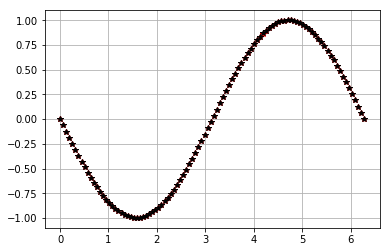

In [72]:
plt.plot(x,DY2,'r*')
plt.plot(x,DY2E, 'k*')
plt.grid()

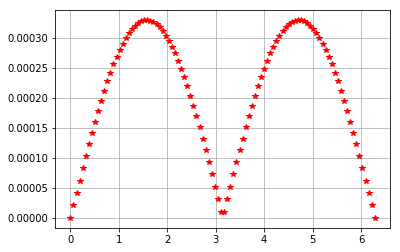

In [73]:
plt.plot(x,abs(DY2-DY2E),'r*')
plt.grid()